## 목표 : 숫자 0 ~ 9 이미지를 분류
- 데이터셋
- 데이터구성 : 이미지 데이터 + 클래스(타겟, 라벨) => 지도학습
- 학습방법 : 지도학습 중 분류
    * 로지스틱회귀, KNN, 결정트리, 랜덤포레스트
    * 분류 모델 중 하나를 선택

- 구현과정
    * 데이터 준비 : 기본적인 분석
    * 데이터 전처리 -> 결측치, 중복, 이상치... 스케일링
    * 학습 준비 
        * 데이터 + 타겟 분리
        * 학습용, 테스트용, 검증용 데이터 준비 
    * 학습
        * 학습모델 객체 생성
        * 학습진행
    * 평가
        * 예측 => 평가
        * 과대적합 또는 과소적합 => 교차검증
    * 모델 저장
        * 저장된 모델 활용

---
### [1] 데이터준비

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

---
### [2-1] 데이터 로딩 

In [10]:
digitsBunch = load_digits()

In [7]:
digitsBunch.keys() #번치타입은 키랑 value값으로 이루어져있다

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
data = digitsBunch['data']
target = digitsBunch['target']

In [10]:
type(data), data.shape, type(target), target.shape

(numpy.ndarray, (1797, 64), numpy.ndarray, (1797,))

In [23]:
target[-1]

8

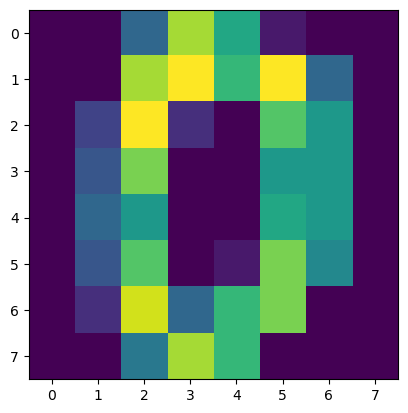

In [26]:
# 1개의 데이터 확인 => 이미지 8*8

plt.imshow(data[0].reshape(-1,8))

---
### [3] 데이터 전처리
수치값 스케일링 => 0 ~ 255 스케일링


In [28]:
scaled_data = data/255

In [29]:
scaled_data.min(),scaled_data.max()

(0.0, 0.06274509803921569)

In [14]:
mnScaler = MinMaxScaler()
mnScaler.fit(data)

MinMaxScaler()

In [15]:
scaled_data = mnScaler.transform(data)

---
## [3] 데이터 학습 준비

In [16]:
X_trian, X_test, y_train, y_test = train_test_split(scaled_data,target)

In [39]:
# [4] 모델 객체 생성

knnMOdel = KNeighborsClassifier()
knnMOdel.fit(X_trian,y_train)

KNeighborsClassifier()

In [40]:
knnMOdel.classes_ #0에서 9까지 클래스를 나누었다.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
knnMOdel.n_samples_fit_ #1347개를 학습했다

1347

In [42]:
#평가
#학습데이터로 평가해보고
#테스트데이터로 평가해본다.

knnMOdel.score(X_trian,y_train) #몇래르 맞추었는지 준다. 매트릭스의 스코어를 주는 거랑 같다

c:\Users\seo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9888641425389755

In [44]:
round(knnMOdel.score(X_test,y_test),2)

c:\Users\seo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.99

In [63]:
#예측!
#데이터를 만들어야한다. 학습에도 사용안한 데이터! 64개짜리 데이터 2차원이어야한다! => 스케일링하기! 
new_data = data[-1]
new_data

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

In [64]:
new_data.shape

(64,)

In [65]:
new_data = new_data.reshape(1,-1)
new_data.shape

(1, 64)

In [66]:
new_data

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [67]:
new_data.reshape(8,8)

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [56]:
new_data = mnScaler.transform(new_data)

In [57]:
knnMOdel.predict(new_data)

c:\Users\seo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([8])

In [58]:
knnMOdel.predict_proba(new_data)

array([[0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ]])

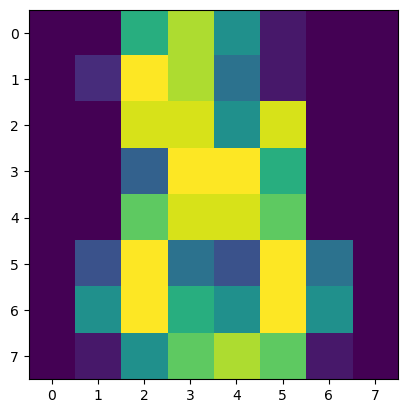

In [68]:
plt.imshow(new_data.reshape(8,8))

plt.savefig('savefig_default.png')

In [ ]:
IMG = ""

In [ ]:
#이미지를 벡터화 시켜서 ! 다시 이미지로 만들어야한다.
#이미지를 바꾸는 페이지를 찾는다.


In [2]:
import cv2
img = cv2.imread("savefig_default.png")

In [3]:
cv2.imshow("default", img) 

: 

In [1]:
from sklearn.utils import all_estimators

In [8]:
X_trian

NameError: name 'X_trian' is not defined

In [17]:
rets=all_estimators(type_filter='classifier')

result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        model.fit(X_trian,y_train)
        sc=model.score(X_trian,y_train)
        result.append((name, round(sc, 2)))
    except Exception:
        pass

c:\Users\seo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\seo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [18]:
sorted(result, key=lambda x : x[1], reverse=True) #정렬해서 보여주기

[('BaggingClassifier', 1.0),
 ('DecisionTreeClassifier', 1.0),
 ('ExtraTreeClassifier', 1.0),
 ('ExtraTreesClassifier', 1.0),
 ('GaussianProcessClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('LabelPropagation', 1.0),
 ('LabelSpreading', 1.0),
 ('LogisticRegressionCV', 1.0),
 ('MLPClassifier', 1.0),
 ('RadiusNeighborsClassifier', 1.0),
 ('RandomForestClassifier', 1.0),
 ('SVC', 1.0),
 ('CalibratedClassifierCV', 0.99),
 ('KNeighborsClassifier', 0.99),
 ('LinearSVC', 0.99),
 ('LogisticRegression', 0.99),
 ('SGDClassifier', 0.99),
 ('PassiveAggressiveClassifier', 0.98),
 ('Perceptron', 0.98),
 ('NuSVC', 0.97),
 ('LinearDiscriminantAnalysis', 0.96),
 ('QuadraticDiscriminantAnalysis', 0.96),
 ('RidgeClassifier', 0.95),
 ('RidgeClassifierCV', 0.95),
 ('MultinomialNB', 0.91),
 ('NearestCentroid', 0.9),
 ('BernoulliNB', 0.87),
 ('GaussianNB', 0.85),
 ('ComplementNB', 0.82),
 ('CategoricalNB', 0.72),
 ('AdaBoostClassifier', 0.27),
 ('DummyCla

In [4]:
FILE = r'C:\Users\seo\Desktop\ex_dacon\ex_ml\Banna.jpg'

In [6]:
from PIL import Image
# im = Image.open("hopper.ppm")
try :

    im = Image.open(FILE)

except Exception as e:
    print(e)


In [7]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [10]:
#png 이미지 파일 속성
im.width, im.height

(225, 225)

In [11]:
#이미지 low데이터 가져온것 16진수로 가져옴.

im.tobytes() 

b'\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x

In [12]:
im.tobitmap()

ValueError: not a bitmap

In [14]:
im.mode

'RGB'

In [16]:
im.show()

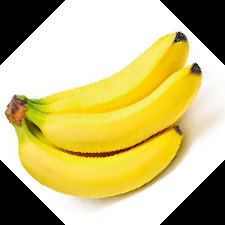

In [17]:
im.rotate(45)

In [18]:
g_img = im.convert("L")

In [19]:
g_img.show()

In [21]:
g_img.mode

'L'

In [ ]:
#이미지 헤더 중요하다.
#오픈cv
#opencv 